In [62]:
import os
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers

In [63]:
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 10

In [64]:
# Paths: For local machine
data_dir = 'C:/Users/Nick/Desktop/stock images/train'
categories = ['chan_down', 'chan_up', 'doub_bot', 'doub_top', 'hs', 'tri', 'wed_down', 'wed_up']

# Paths: For local machine
train_dir = 'C:/Users/Nick/Desktop/stock images/train'
validation_dir = 'C:/Users/Nick/Desktop/stock images/validation'

In [66]:
def mapto1hot(ytrain, yval, ytest):
    # One hot encoding for the number of categories we will be looking at.,
    ytrain_1hot = keras.utils.to_categorical(ytrain, num_classes = len(categories))
    yval_1hot = keras.utils.to_categorical(yval, num_classes = len(categories))
    ytest_1hot = keras.utils.to_categorical(ytest, num_classes = len(categories))
    
    return ytrain_1hot, yval_1hot, ytest_1hot

In [67]:
def convert_images(data: list, labels: list):
    for category_idx, category in enumerate(categories):
        count = 0
        
        for file in os.listdir(data_dir + '/' + category):
            image = imread(data_dir + '/' + category + '/' + file)
            image = resize(image, (IMG_SHAPE, IMG_SHAPE))
            data.append(image)
            labels.append(category_idx)
            count += 1
            if count > 4000:
                break
            
    return data, labels

In [68]:
def show_history(history):    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='upper right')
    plt.ylabel('Accuracy')
    plt.ylim([0,0.3])
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [11]:
# data = []
# labels = []

In [12]:
# data, labels = convert_images(data, labels)
# data1 = np.asarray(data)
# labels1 = np.asarray(labels)
# # Split data into train and test sets using 42 to make reproducable results
# xtrain, xtest, ytrain, ytest = train_test_split(data1, labels1, test_size=0.2, random_state=42, shuffle=True, stratify=labels1)

# # Normalize the data by dividing 1 by 255 (rgb value),
# xtrain = xtrain/255
# xtest = xtest/255
# 
# # Create validation set
# xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2)
# 
# # One Hot Encoding
# ytrain_1hot, yval_1hot, ytest_1hot = mapto1hot(ytrain, yval, ytest)

KeyboardInterrupt: 

In [69]:
# Create training and validation dataset
train_ds  = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=(IMG_SIZE, IMG_SIZE))

val_ds  = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=(IMG_SIZE, IMG_SIZE))

Found 67613 files belonging to 8 classes.
Found 19833 files belonging to 8 classes.


In [70]:
class_names = train_ds.class_names
print(class_names)

['chan_down', 'chan_up', 'doub_bot', 'doub_top', 'hs', 'tri', 'wed_down', 'wed_up']


In [ ]:
# Test fucntion to see how the images work with this pixal count
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [71]:
# Create a test set
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [83]:
# AUTOTUNE = tf.data.AUTOTUNE
# 
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [84]:
# Create a test set
val_batches = tf.data.experimental.cardinality(val_ds)
test_dataset = val_ds.take(val_batches // 5)
validation_dataset = val_ds.skip(val_batches // 5)

In [73]:
normalization_layer = keras.layers.Rescaling(1./255)

In [75]:
num_classes = len(class_names)

model = Sequential([
  keras.layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

In [79]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,121,896 (8.09 MB)

 Trainable params: 2,121,896 (8.09 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 146s 61ms/step - accuracy: 0.1698 - loss: 2.0896 - val_accuracy: 0.1904 - val_loss: 2.0528
Epoch 2/10
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 103s 49ms/step - accuracy: 0.1699 - loss: 2.0648 - val_accuracy: 0.1904 - val_loss: 2.0519
Epoch 3/10
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 103s 49ms/step - accuracy: 0.1678 - loss: 2.0653 - val_accuracy: 0.1904 - val_loss: 2.0516
Epoch 4/10
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 103s 49ms/step - accuracy: 0.1699 - loss: 2.0653 - val_accuracy: 0.1904 - val_loss: 2.0516
Epoch 5/10
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 103s 49ms/step - accuracy: 0.1707 - loss: 2.0645 - val_accuracy: 0.1904 - val_loss: 2.0511
Epoch 6/10
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 103s 49ms/step - accuracy: 0.1712 - loss: 2.0641 - val_accuracy: 0.1904 - val_loss: 2.0527
Epoch 7/10
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 103s 49ms/step - accuracy: 0.1688 - loss: 2.0656 - val_accuracy: 0.1904 - val_loss: 2.0564
Epoch 8/10
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 106s 50ms/step - accuracy: 

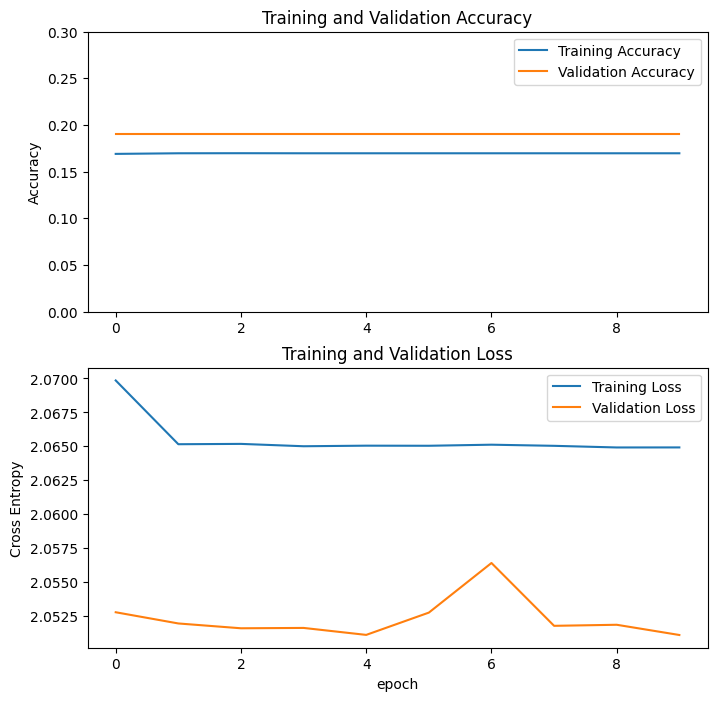

In [81]:
show_history(history)

In [85]:
class_names = train_ds.class_names

# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [82]:
gc.collect()

5282